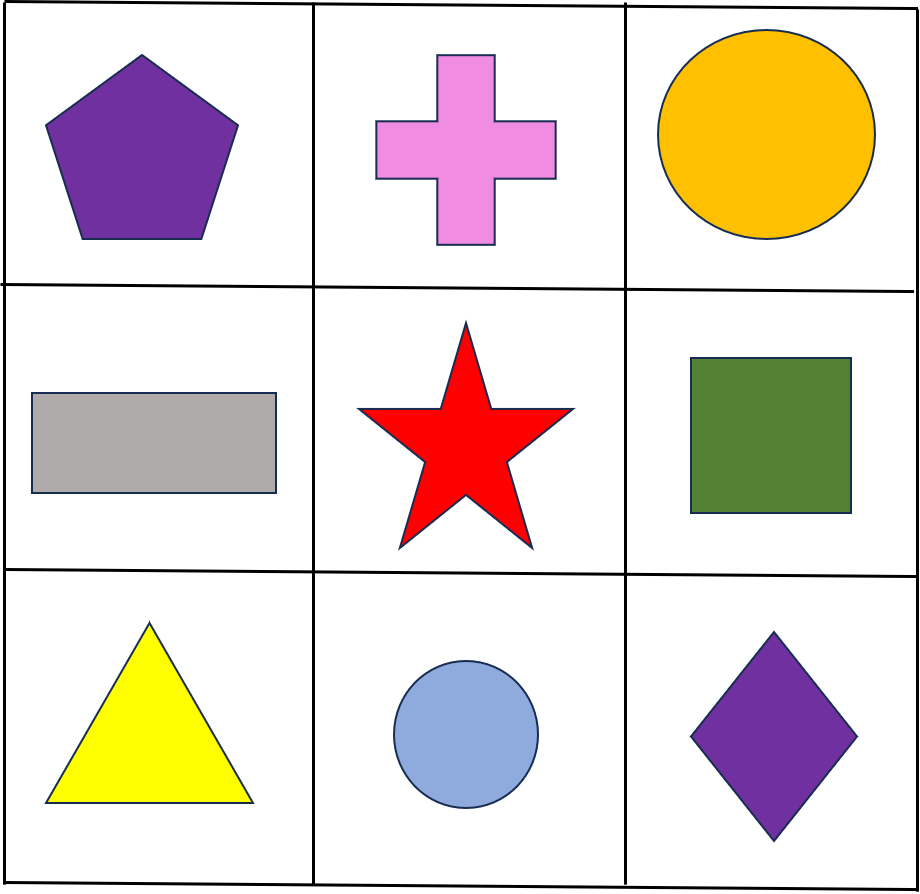

In [16]:
from IPython.display import display, HTML, Image, clear_output
import time
import requests
from bs4 import BeautifulSoup
import json

grid_1 = Image("memory_1.png", width=400)
grid_2 = Image("memory_2.png", width=400)
grid_3 = Image("memory_3.png", width=400)
q5_level_1= Image("q5_level_1.png", width=400)
q5= Image("q5.png", width=400)
display(grid_1)

In [2]:
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
  

In [17]:
def run_memory_test ():

    question_bank_2=["What color was the heart?", "How many blank grids were there?", "Which shape has yellow color?", "What color was circle?", "What shape was in the indicated position?"]
    answer_2=["red","three","star", "blue", "rectangle"]

    question_bank_1=["What color was the square?", "How many shapes have the same color?", "What color was the 'plus' sign?", "What shape was between the triangle and diamond?",
                  "What shape is in the indicated position?"]
    answer_1=["green","two","pink", "circle", "pentagon"]
    
    question_bank_3=["What color was the heart?","What shape was inside the 'plus' sign?", "Which direction was the arrow in the green square pointing at?","How many shapes were inside the star?",
                 "What color of star is in the indicated position?"]
    answer_3=["black","circle","right", "two", "yellow"]
    
    html_content = HTML('<p style="font-size: 25px;">Memory Test</p>')
    display(html_content)

    global user
    
    user = input("What is your name?")
    
    print(f"Hi {user}, welcome to memory test!! You will be given time to memorise the following image amd answer questions related to the image. There are a total of three levels in this test.")
    
    print("Good luck!!")
    time.sleep (5)
    clear_output(wait=False)

    html_content_1 = HTML('<p style="font-size: 20px;">Level 1</p>')
    display(html_content_1)
    display(grid_2)
    time.sleep(10)
    clear_output(wait=False)
    
    start_time_1 = time.time()
    
    answer = ""
    total_score = 0
    
    len_ques = len(question_bank_1)
    
    for i in range(len_ques):
        if i == 4:
            display(q5_level_1)

        ques = question_bank_2[i]
        ans = answer_2[i]
        answer=input(ques)
        
        if answer == ans:
            print ("Correct!")
            total_score = total_score + 1
        else:
            print(f"Sorry, the correct answer is: {ans}")

        time.sleep(1)
        clear_output(wait=False)
        
    end_time_1=time.time() 
    time_taken_1 = end_time_1 - start_time_1
    
    html_content_2 = HTML('<p style="font-size: 20px;">Level 2</p>')
    display(html_content_2)
    display(grid_1)
    time.sleep (12)
    clear_output(wait=False)

    start_time_2 = time.time()
    
    for i in range(len_ques):
        if i == 4:
            display(q5)

        ques = question_bank_1[i]
        ans = answer_1[i]
        answer=input(ques)
        
        if answer == ans:
            print ("Correct!")
            total_score = total_score + 1
        else:
            print(f"Sorry, the correct answer is: {ans}")

        time.sleep(1)
        clear_output(wait=False)
        
    end_time_2=time.time() 
    time_taken_2 = end_time_2 - start_time_2

    html_content_3 = HTML('<p style="font-size: 20px;">Level 3</p>')
    display(html_content_3)
    
    display(grid_3)
    time.sleep (15)
    clear_output(wait=False)

    start_time_3 = time.time()
    
    for i in range(len_ques):
        if i == 4:
            display(q5)

        ques = question_bank_3[i]
        ans = answer_3[i]
        answer=input(ques)
        
        if answer == ans:
            print ("Correct!")
            total_score = total_score + 1
        else:
            print(f"Sorry, the correct answer is: {ans}")

        time.sleep(1)
        clear_output(wait=False)
        
    end_time_3=time.time() 
    time_taken_3 = end_time_3 - start_time_3
    
    total_time_taken = time_taken_1 + time_taken_2 + time_taken_3
    return_total_time_taken = print(f"You took {total_time_taken}s to answers 15 questions")
    
    return_total_score = print(f"Your total score for the level 1,2 and 3 is {total_score}")

    data_dict= {  
        'name': user,
        'score': total_score,
        'total_time': total_time_taken}

    form_url = "https://docs.google.com/forms/d/13Bi42ACji9LAjNEWZDrm6YA9LHnWpUQj4zSN5qiWD1Y/edit"

    return return_total_time_taken, return_total_score

#judging matrix: speed and accuracy
run_memory_test()

You took 100.09424304962158s to answers 15 questions
Your total score for the level 1,2 and 3 is 10


(None, None)